In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/article_level_data.csv')





In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['article'], df['class'], test_size=0.2, random_state=42)

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)



In [23]:

from sklearn.linear_model import LogisticRegression

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict the classes for the test set
y_pred = model.predict(X_test_tfidf)

In [24]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns




Accuracy: 0.8627450980392157
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        96
           1       0.87      0.87      0.87       108

    accuracy                           0.86       204
   macro avg       0.86      0.86      0.86       204
weighted avg       0.86      0.86      0.86       204



In [25]:
while True:
    text_input = input("Enter Your Text: ")
    text_input_tfidf = vectorizer.transform([text_input])
    predicted_class = model.predict(text_input_tfidf)

    if predicted_class[0] == 1:
        print("The input text is classified as ChatGPT.")
    else:
        print("The input text is classified as non-ChatGPT.")

    # Ask if user wants to continue
    continue_input = input("Do you want to classify more text? (yes/no): ").strip().lower()
    if continue_input != 'yes':
        print("Exiting the classifier. Goodbye!")
        break


Enter Your Text: i dont have a lot of skills
The input text is classified as non-ChatGPT.
Do you want to classify more text? (yes/no): no
Exiting the classifier. Goodbye!


In [26]:

import joblib

# Save the model and vectorizer
joblib.dump((model, vectorizer), 'model_vectorizer.pkl')
# To load later and predict again:
model, vectorizer = joblib.load('model_vectorizer.pkl')



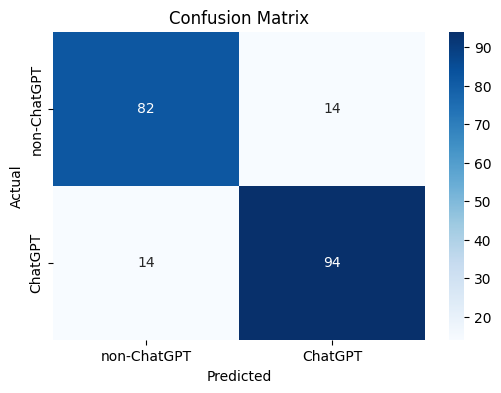

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['non-ChatGPT', 'ChatGPT'], yticklabels=['non-ChatGPT', 'ChatGPT'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
